In [1]:
# %pip install scipy
# %pip install soundfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from si_prefix import si_format
import mc_helper
from thdn_calc import THDN

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Couldn't analyze "--f=/home/madvlsi/.local/share/jupyter/runtime/kernel-v2-444293L6B8rASzUx.json"
Error opening '--f=/home/madvlsi/.local/share/jupyter/runtime/kernel-v2-444293L6B8rASzUx.json': System error.



1: unbalanced (pMOS width = 3)
2: semi-balanced (pMOS width = 6)
3: balanced (pMOS width = 8)
4: balanced (pMOS width = 8) and 100ns pulse but 2MHz sine wave

   time   i(VIin)   v(Vout)
0   0.0 -0.000001  0.275907
   time   i(VIin)   v(Vout)
0   0.0 -0.000001  0.275907


/home/madvlsi/dev/git/magic-dds/simulations/switched_capacitor/mc_helper.py:13: RuntimeWarning: divide by zero encountered in log10
  precision = max(0, sigfigs - np.floor(np.log10(abs(val))) % 3 - 1)
/home/madvlsi/dev/git/magic-dds/simulations/switched_capacitor/mc_helper.py:13: RuntimeWarning: invalid value encountered in scalar remainder
  precision = max(0, sigfigs - np.floor(np.log10(abs(val))) % 3 - 1)


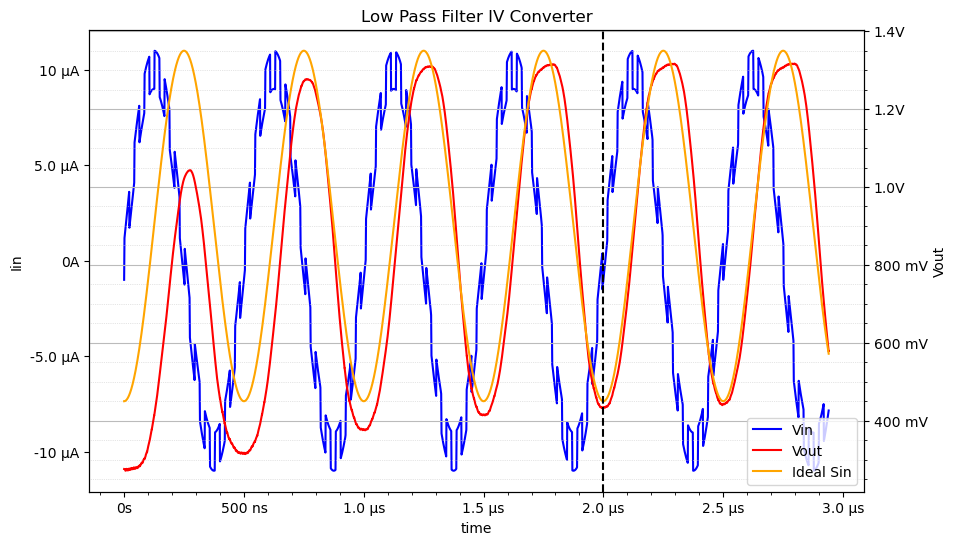

In [8]:
filename = "sin_out_2.txt"
df = pd.read_csv(filename, delimiter = "\s+")
print(df.head(1))
df.rename({"v(Vin)": "Vin", "v(Vout)": "Vout"}, inplace = True)
print(df.head(1))

freq_hz = 2 * np.pi * 2e6
phase = 2 * np.pi / 360 * 90
amplitude = 0.45
offset = 0.9
ideal_sin = amplitude * np.sin(freq_hz * df["time"] - phase) + offset

fig, ax1 = plt.subplots(figsize = (10, 6))
ax2 = ax1.twinx()
mc_helper.axes_labels("time", "s", "Iin", "A", "", ax1)
mc_helper.axes_labels("time", "s", "Vout", "V", "Low Pass Filter IV Converter", ax2)
mc_helper.make_grids()
ax1.plot(df["time"].values, df["i(VIin)"].values, color = "blue", label = "Vin")
ax2.plot([], [], color = "blue", label = "Vin")
ax2.plot(df["time"].values, df["v(Vout)"].values, color = "red", label = "Vout")
ax2.plot(df["time"].values, ideal_sin.values, color = "orange", label = "Ideal Sin")
ax2.axvline(2.0e-6, color = "black", linestyle = "dashed")
plt.legend(loc = "lower right")

In [5]:
sample_rate = 1 / np.diff(df["time"])[0]
# var_for_thd = df[df["time"] > 2e-6]["v(Vout)"].reset_index()
var_for_thd = df[df["time"] > 5e-6].reset_index()["v(Vout)"]
print(var_for_thd)
thd = THDN(var_for_thd, sample_rate)
# thd = THDN(df[df["time"] > 1.5e-6]["v(Vout)"], sample_rate)
print(thd) # 18.8777% or -14.5 dB

0         0.327738
1         0.327737
2         0.327734
3         0.327727
4         0.327719
            ...   
276228    1.282624
276229    1.282637
276230    1.282650
276231    1.282663
276232    1.282669
Name: v(Vout), Length: 276233, dtype: float64


Frequency: 181006613.981675 Hz
3
9
THD+N:     11.1157% or -19.1 dB
None
